In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

In [2]:
# import data 
data = pd.read_csv('cleaned_demo_data.csv')
data.shape

(1598097, 5)

In [3]:
data.head()

,date,state,minor,adult,total
0,01-03-2025,Uttar Pradesh,49,529,578
1,01-03-2025,Andhra Pradesh,22,375,397
2,01-03-2025,Gujarat,65,765,830
3,01-03-2025,Andhra Pradesh,24,314,338
4,01-03-2025,Rajasthan,45,785,830


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598097 entries, 0 to 1598096
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   date    1598097 non-null  object
 1   state   1598097 non-null  object
 2   minor   1598097 non-null  int64 
 3   adult   1598097 non-null  int64 
 4   total   1598097 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 61.0+ MB


In [5]:
# convert data type of date column -> datetime 
data['date'] = pd.to_datetime(data['date'], errors = 'coerce', dayfirst=True)
data['date'].dtype

dtype('<M8[ns]')

In [6]:
data.head(1) # date -> yyyy-mm-dd

,date,state,minor,adult,total
0,2025-03-01,Uttar Pradesh,49,529,578


In [7]:
data['date'].isnull().sum()

0

In [8]:
# create another column as year_month for monthly analysis 
data['year_month'] = data['date'].dt.to_period('M')
data.head(1)

,date,state,minor,adult,total,year_month
0,2025-03-01,Uttar Pradesh,49,529,578,2025-03


In [9]:
# converting numebr of updates to ratios 
data['minor'] = round((data['minor']/ data['total'])*100,1)
data['adult'] = round((data['adult']/ data['total'])*100,1)
data.head()

,date,state,minor,adult,total,year_month
0,2025-03-01,Uttar Pradesh,8.5,91.5,578,2025-03
1,2025-03-01,Andhra Pradesh,5.5,94.5,397,2025-03
2,2025-03-01,Gujarat,7.8,92.2,830,2025-03
3,2025-03-01,Andhra Pradesh,7.1,92.9,338,2025-03
4,2025-03-01,Rajasthan,5.4,94.6,830,2025-03


# aggregate data using state and data 

In [11]:
monthly_data = data.groupby(['state','date'],as_index=False).agg({'minor': 'mean','adult': 'mean','total': 'sum'})
monthly_data['minor'] = round(monthly_data['minor'],1) 
monthly_data['adult'] = round(monthly_data['adult'],1) 
monthly_data.head()

,state,date,minor,adult,total
0,Andaman and Nicobar Islands,2025-03-01,12.2,87.8,931
1,Andaman and Nicobar Islands,2025-07-01,9.1,90.9,219
2,Andaman and Nicobar Islands,2025-09-01,1.9,98.1,80
3,Andaman and Nicobar Islands,2025-09-02,7.8,92.2,74
4,Andaman and Nicobar Islands,2025-09-03,3.6,96.4,68


In [12]:
monthly_data.shape

(3359, 5)

In [13]:
# avg demographic updates across india 
national_avg_per_month  = data.groupby('year_month',as_index=False).agg({'minor':'mean', 'adult': 'mean', 'total': 'sum'})
national_avg_per_month[['minor', 'adult']] = round(national_avg_per_month[['minor', 'adult']], 1)

In [14]:
national_avg_per_month

,year_month,minor,adult,total
0,2025-03,11.2,88.8,8190152
1,2025-04,13.8,86.2,907282
2,2025-05,14.8,85.2,939768
3,2025-06,14.6,85.4,1040944
4,2025-07,14.0,86.0,1510892
5,2025-09,10.7,89.3,5973259
6,2025-10,12.1,87.9,3833155
7,2025-11,11.8,88.2,7084305
8,2025-12,10.7,89.3,7117800


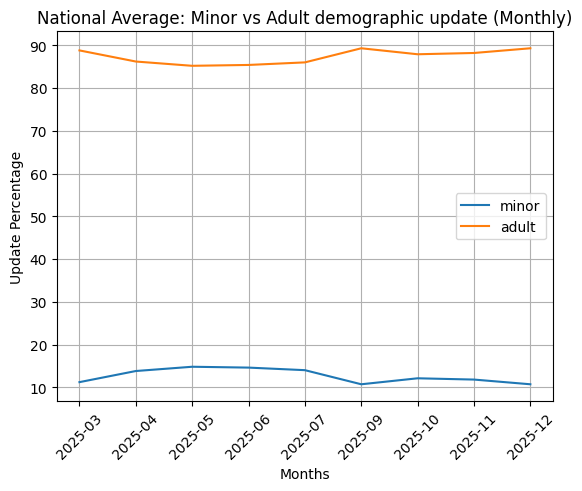

In [15]:
national_avg_per_month[['minor', 'adult']].plot(kind = 'line', title='National Average: Minor vs Adult demographic update (Monthly)')
plt.ylabel('Update Percentage')
x_labels = national_avg_per_month['year_month']
# Set x ticks and labels
plt.xticks(ticks=range(len(x_labels)),labels=x_labels,rotation=45)
plt.xlabel('Months')
plt.grid(True)

In [16]:
national_avg_per_month['year_month'] = national_avg_per_month['year_month'].dt.to_timestamp()

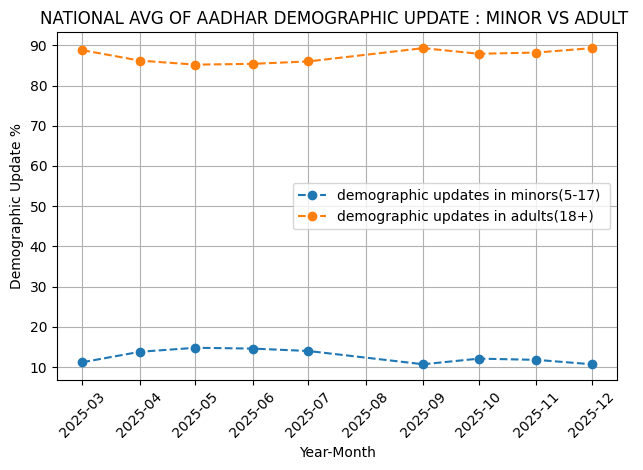

In [17]:
# plot minor vs adult 
#plt.figure(figsize=(8,5))
plt.plot(national_avg_per_month['year_month'], national_avg_per_month['minor'], marker = 'o', linestyle = '--',label = 'demographic updates in minors(5-17) ')
plt.plot(national_avg_per_month['year_month'], national_avg_per_month['adult'], marker = 'o',linestyle = '--',label = 'demographic updates in adults(18+)')
plt.xlabel('Year-Month')
plt.ylabel('Demographic Update %')
plt.title('NATIONAL AVG OF AADHAR DEMOGRAPHIC UPDATE : MINOR VS ADULT ')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()